# A Generate Data Sets for Gene Annotations

### Set up imports

In [1]:
import pandas as pd
from IPython.display import Image
from BCBio import GFF


### Show uniprot image

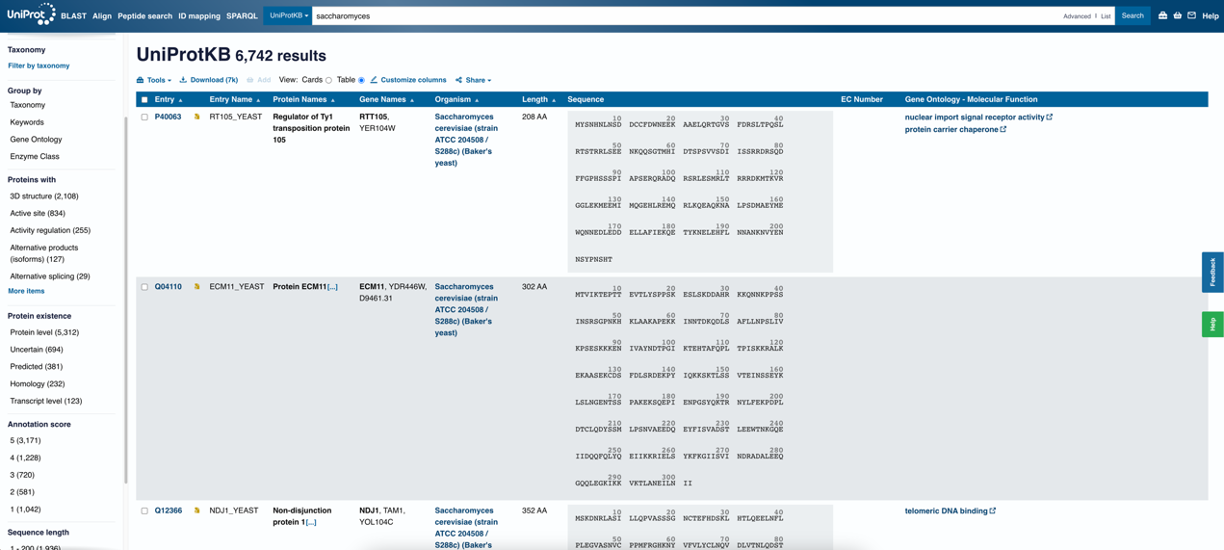

In [ ]:
Image('../screenshots/uniprot.png')

### Load Saccromyces cerevisae genes

In [ ]:
uniprot_df = pd.read_excel('../data/uniprotkb_saccharomyces_AND_model_organ_2024_12_04.xlsx')

uniprot_df


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,EC number,Gene Ontology (molecular function)
0,A0A0B7P3V8,reviewed,YP41B_YEAST,Transposon Ty4-P Gag-Pol polyprotein (TY4A-TY4...,TY4B-P YPLCTy4-1 POL YPL060C-A,Saccharomyces cerevisiae (strain ATCC 204508 /...,1104,MATPVRDETRNVIDDNISARIQSKVKTNDTVRQTPSSLRKVSIKDE...,2.7.7.49; 2.7.7.7; 3.1.26.4; 3.4.23.-,aspartic-type endopeptidase activity [GO:00041...
1,D6VTK4,reviewed,STE2_YEAST,Pheromone alpha factor receptor,STE2 YFL026W,Saccharomyces cerevisiae (strain ATCC 204508 /...,431,MSDAAPSLSNLFYDPTYNPGQSTINYTSIYGNGSTITFDELQGLVN...,NaN,mating-type alpha-factor pheromone receptor ac...
2,O13297,reviewed,CET1_YEAST,mRNA-capping enzyme subunit beta (EC 3.6.1.74)...,CET1 YPL228W P1433,Saccharomyces cerevisiae (strain ATCC 204508 /...,549,MSYTDNPPQTKRALSLDDLVNHDENEKVKLQKLSEAANGSRPFAEN...,3.6.1.74,mRNA 5'-triphosphate monophosphatase activity ...
3,O13329,reviewed,FOB1_YEAST,DNA replication fork-blocking protein FOB1,FOB1 HRM1 YDR110W YD9727.06,Saccharomyces cerevisiae (strain ATCC 204508 /...,566,MTKPRYNDVLFDDDDSVPSESVTRKSQRRKATSPGESRESSKDRLL...,NaN,metal ion binding [GO:0046872]; rDNA spacer re...
4,O13516,reviewed,RS9A_YEAST,Small ribosomal subunit protein uS4A (40S ribo...,RPS9A RPS13A YS11A YPL081W,Saccharomyces cerevisiae (strain ATCC 204508 /...,197,MPRAPRTYSKTYSTPKRPYESSRLDAELKLAGEFGLKNKKEIYRIS...,NaN,rRNA binding [GO:0019843]; structural constitu...
...,...,...,...,...,...,...,...,...,...,...
6737,Q9ZZW3,reviewed,Q0143_YEAST,"Putative uncharacterized protein Q0143, mitoch...",Q0143 ORF10,Saccharomyces cerevisiae (strain ATCC 204508 /...,50,MGLWISFGTPPSYTYLLIMNHKLLLINNNNLTEVHTYFNININIDK...,NaN,NaN
6738,Q9ZZW4,reviewed,Q0142_YEAST,"Putative uncharacterized protein Q0142, mitoch...",Q0142 ORF9,Saccharomyces cerevisiae (strain ATCC 204508 /...,58,MTGSGTPPSREVNTYYMTMTMTMTMIMIMTMTMNIHFNNNNNNNIN...,NaN,NaN
6739,Q9ZZX7,reviewed,Q0032_YEAST,"Putative uncharacterized protein Q0032, mitoch...",Q0032 ORF8,Saccharomyces cerevisiae (strain ATCC 204508 /...,96,MLMMYMLFIMMKTYPMLSYHMMSYHIMLYTIMWYMKYSTYMRLWLL...,NaN,NaN
6740,Q9ZZX8,reviewed,Q0017_YEAST,"Putative uncharacterized protein Q0017, mitoch...",Q0017 ORF7,Saccharomyces cerevisiae (strain ATCC 204508 /...,53,MCATYMFNITVIITHPTPTLRTRGPGFVRNRDLYIYKYKSNLINNL...,NaN,NaN


### Load the saccharomyces GFF file

In [2]:
with open("../data/genomic.gff") as gff_file:
    for record in GFF.parse(gff_file):
        print(f"Record: {record.id}")

Record: NC_001133.9
Record: NC_001134.8
Record: NC_001135.5
Record: NC_001136.10
Record: NC_001137.3
Record: NC_001138.5
Record: NC_001139.9
Record: NC_001140.6
Record: NC_001141.2
Record: NC_001142.9
Record: NC_001143.9
Record: NC_001144.5
Record: NC_001145.3
Record: NC_001146.8
Record: NC_001147.6
Record: NC_001148.4
Record: NC_001224.1


### Make a data table

In [5]:
# Parse the GFF file
gff_file_path = "../data/genomic.gff"  # Replace with the path to your GFF file
features_list = []

# Open and parse the GFF file
with open(gff_file_path) as gff_file:
    for record in GFF.parse(gff_file):
        for feature in record.features:
            # Extract relevant information for each feature
            feature_data = {
                "Record_ID": record.id,
                "Feature_Type": feature.type,
                "Start": feature.location.start,
                "End": feature.location.end,
                "Strand": feature.strand,
                "Attributes": feature.qualifiers,
            }
            features_list.append(feature_data)

# Convert the list of features to a pandas DataFrame
df = pd.DataFrame(features_list)

# Display the DataFrame
df.head(50)

/Users/garrettroell/FunGenomeGPT/venv/lib/python3.10/site-packages/Bio/SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(


,Record_ID,Feature_Type,Start,End,Strand,Attributes
0,NC_001133.9,region,0,230218,1,"{'ID': ['NC_001133.9:1..230218'], 'Dbxref': ['..."
1,NC_001133.9,telomere,0,801,-1,"{'ID': ['id-NC_001133.9:1..801'], 'Dbxref': ['..."
2,NC_001133.9,origin_of_replication,706,776,1,"{'ID': ['id-NC_001133.9:707..776'], 'Dbxref': ..."
3,NC_001133.9,gene,1806,2169,-1,"{'ID': ['gene-YAL068C'], 'Dbxref': ['GeneID:85..."
4,NC_001133.9,gene,2479,2707,1,"{'ID': ['gene-YAL067W-A'], 'Dbxref': ['GeneID:..."
5,NC_001133.9,gene,7234,9016,-1,"{'ID': ['gene-YAL067C'], 'Dbxref': ['GeneID:85..."
6,NC_001133.9,origin_of_replication,7996,8547,1,"{'ID': ['id-NC_001133.9:7997..8547'], 'Dbxref'..."
7,NC_001133.9,gene,11564,11951,-1,"{'ID': ['gene-YAL065C'], 'Dbxref': ['GeneID:85..."
8,NC_001133.9,gene,12045,12426,1,"{'ID': ['gene-YAL064W-B'], 'Dbxref': ['GeneID:..."
9,NC_001133.9,gene,13362,13743,-1,"{'ID': ['gene-YAL064C-A'], 'Dbxref': ['GeneID:..."


In [ ]:
from BCBio import GFF
import pandas as pd

# Parse the GFF file
gff_file_path = "../data/genomic.gff"   # Replace with your GFF file path
features_list = []

# Open and parse the GFF file
with open(gff_file_path) as gff_file:
    for record in GFF.parse(gff_file):
        for feature in record.features:
            # Extract basic feature data
            feature_data = {
                "Record_ID": record.id,
                "Feature_Type": feature.type,
                "Start": feature.location.start,
                "End": feature.location.end,
                "Strand": feature.strand,
            }
            # Include the attributes (qualifiers)
            for key, value in feature.qualifiers.items():
                feature_data[key] = ";".join(value)  # Join multiple values with semicolon
            
            features_list.append(feature_data)

# Convert to DataFrame
df = pd.DataFrame(features_list)

# Display the DataFrame
print(df.head())

# Save to CSV for easier analysis
df.to_csv("parsed_gff.csv", index=False)
